In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Class counts (class names):
leopard      200
cougar       116
flamingo     112
crocodile    107
butterfly     93
kangaroo      86
scorpion      84
llama         78
crab          73
crayfish      72
dragonfly     68
dolphin       65
elephant      64
rhino         59
beaver        46
pigeon        45
lobster       44
octopus       36
Name: count, dtype: int64

New class counts after augmentation (class names):
leopard      200
scorpion     200
llama        200
beaver       200
crayfish     200
crab         200
lobster      200
cougar       200
butterfly    200
dragonfly    200
pigeon       200
flamingo     200
dolphin      200
kangaroo     200
elephant     200
octopus      200
rhino        200
crocodile    200
Name: count, dtype: int64
Epoch 1/50


I0000 00:00:1734724744.074921    4029 service.cc:145] XLA service 0x7ec574079580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734724744.074970    4029 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 2/90 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.0781 - loss: 5.3016    

I0000 00:00:1734724801.682570    4029 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 92s 131ms/step - accuracy: 0.0770 - loss: 4.3593 - val_accuracy: 0.1069 - val_loss: 3.6387 - learning_rate: 0.0010
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.1380 - loss: 2.8769 - val_accuracy: 0.0292 - val_loss: 3.5624 - learning_rate: 0.0010
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.2084 - loss: 2.6471 - val_accuracy: 0.0333 - val_loss: 3.4002 - learning_rate: 0.0010
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2259 - loss: 2.4962 - val_accuracy: 0.0347 - val_loss: 3.6091 - learning_rate: 0.0010
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2875 - loss: 2.3018 - val_accuracy: 0.0833 - val_loss: 3.0469 - learning_rate: 0.0010
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3118 - loss: 2.1832 - val_accuracy: 0.1042 - val_loss: 3.0905 - learning_rate: 0.0010
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3866 - loss: 1.9792 - val_accuracy: 0.

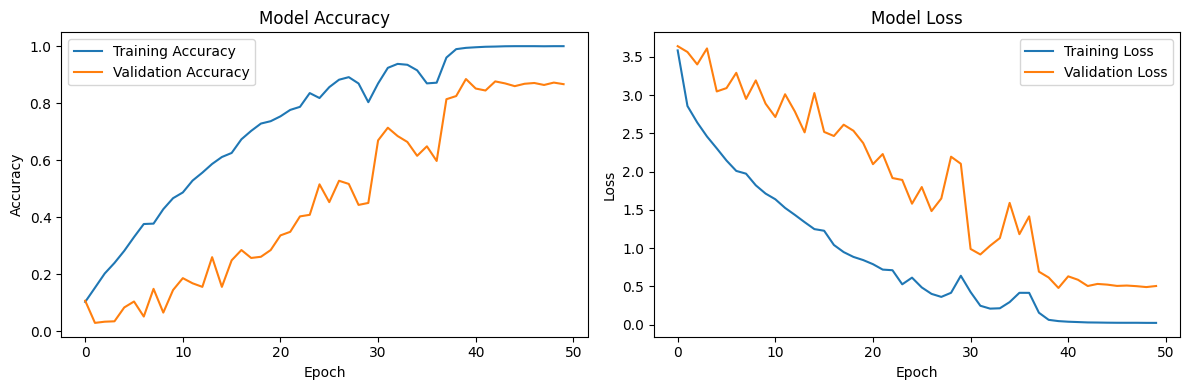

Training Accuracy:  [0.10277777910232544, 0.15243054926395416, 0.20243056118488312, 0.2395833283662796, 0.2819444537162781, 0.33020833134651184, 0.3760416805744171, 0.3774305582046509, 0.4281249940395355, 0.46666666865348816, 0.4868055582046509, 0.5284722447395325, 0.5562499761581421, 0.5868055820465088, 0.6111111044883728, 0.6253471970558167, 0.6732639074325562, 0.7027778029441833, 0.7284722328186035, 0.7368055582046509, 0.753819465637207, 0.7763888835906982, 0.7871527671813965, 0.8354166746139526, 0.8180555701255798, 0.856249988079071, 0.8822916746139526, 0.8913194537162781, 0.8690972328186035, 0.8034722208976746, 0.8690972328186035, 0.9239583611488342, 0.9378471970558167, 0.9347222447395325, 0.9152777791023254, 0.8694444298744202, 0.871874988079071, 0.9600694179534912, 0.9895833134651184, 0.9940972328186035, 0.996180534362793, 0.9979166388511658, 0.9986110925674438, 0.9996528029441833, 1.0, 1.0, 1.0, 0.9996528029441833, 1.0, 1.0]
Validation Accuracy:  [0.10694444179534912, 0.0291666

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models , regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.layers import Input, Embedding, Concatenate
from tensorflow.keras.optimizers import Adam , AdamW
import cv2
import matplotlib.pyplot as plt

# === Step 1: Define Paths ===
image_folder = r"/kaggle/input/animal-kingdom-classification/AnimalTrainData/AnimalTrainData"
csv_path = r"/kaggle/input/animal-kingdom-classification/AnimalTrainData/AnimalTrainData/train.csv"

# === Step 2: Load CSV File ===
df = pd.read_csv(csv_path)

# === Step 3: Create a Mapping of Class Names to Integer Labels ===
class_mapping = {
    "beaver": 0, "butterfly": 1, "cougar": 2, "crab": 3, "crayfish": 4,
    "crocodile": 5, "dolphin": 6, "dragonfly": 7, "elephant": 8, "flamingo": 9,
    "kangaroo": 10, "leopard": 11, "llama": 12, "lobster": 13, "octopus": 14,
    "pigeon": 15, "rhino": 16, "scorpion": 17
}

# === Step 4: Map Image Names to Classes (Integer Labels) ===
image_to_class = dict(zip(df['ImageID'], df['Class']))

def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    image_resized = cv2.resize(image, target_size)
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    image_normalized = image_rgb / 255.0
    return image_normalized

# === Step 5: Load Images and Assign Classes ===
image_data = []
labels = []

for file_name in os.listdir(image_folder):
    if file_name in image_to_class:
        image_path = os.path.join(image_folder, file_name)
        if os.path.isfile(image_path):
            try:
                image_array = preprocess_image(image_path)
                image_data.append(image_array)
                class_name = image_to_class[file_name]
                label = class_mapping.get(class_name, -1)
                if label != -1:
                    labels.append(label)
                else:
                    print(f"Class {class_name} not found in mapping.")
            except (IOError, ValueError) as e:
                print(f"Error reading image {file_name}: {e}")

# Convert to numpy arrays for Keras
image_data = np.array(image_data)
labels = np.array(labels)

# === Step 6: Class Distribution Analysis ===
class_counts = pd.Series(labels).value_counts()
class_names = {v: k for k, v in class_mapping.items()}
class_counts_named = class_counts.rename(index=class_names)

print("\nClass counts (class names):")
print(class_counts_named)

# === Step 7: Balance Classes to Max Class Size Using Augmentation ===
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

max_class_size = class_counts.max()
augmented_images = []
augmented_labels = []

for label in np.unique(labels):
    class_images = image_data[labels == label]
    current_class_size = class_counts[label]

    augmented = datagen.flow(class_images, batch_size=1)
    for _ in range(max_class_size - current_class_size):
        augmented_images.append(next(augmented)[0])
        augmented_labels.append(label)

if augmented_images:
    image_data = np.concatenate([image_data, np.array(augmented_images)])
    labels = np.concatenate([labels, np.array(augmented_labels)])

# Check new class distribution
new_class_counts = pd.Series(labels).value_counts()
new_class_counts_named = new_class_counts.rename(index=class_names)

print("\nNew class counts after augmentation (class names):")
print(new_class_counts_named)

# === Step 8: Define Vision Transformer (ViT) Model from Scratch ===
'''def create_vit_model(input_shape=(224, 224, 3), num_classes=len(class_mapping), patch_size=16, num_patches=196,
                     projection_dim=64, num_heads=4, transformer_layers=10):
    
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = layers.Conv2D(filters=projection_dim,
                            kernel_size=(patch_size, patch_size),
                            strides=(patch_size, patch_size),
                            padding='valid')(inputs)
    
    # Flatten the patches.
    patches_flattened = layers.Reshape((num_patches, projection_dim))(patches)
    
    # Add positional embeddings.
    positions = tf.range(start=0, limit=num_patches, delta=1)
    pos_embedding_layer = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)(positions)
    
    encoded_patches = patches_flattened + pos_embedding_layer
    
    # Create multiple transformer layers.
    for _ in range(transformer_layers):
        # Layer normalization and multi-head self-attention.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads,
                                                     key_dim=projection_dim)(x1, x1)
        
        # Skip connection.
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization and MLP.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3_mlp_output = layers.Dense(units=projection_dim * 4,
                                     activation=tf.nn.gelu)(x3)
        x3_mlp_output = layers.Dense(units=projection_dim)(x3_mlp_output)
        
        # Skip connection.
        encoded_patches = layers.Add()([x3_mlp_output, x2])
    
    # Global average pooling.
    representation_layer = layers.GlobalAveragePooling1D()(encoded_patches)
    
    # Output layer.
    outputs = layers.Dense(units=num_classes,
                           activation='softmax')(representation_layer)
    
    # Create the Keras model.
    model = models.Model(inputs=inputs, outputs=outputs)
    return model
    
vit_model = create_vit_model()

# Compile the model.
vit_model.compile(optimizer=AdamW(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])'''
# === Step 9: Train the ViT Model ===
def create_vit_model(input_shape=(224, 224, 3), num_classes=len(class_mapping)):
    inputs = layers.Input(shape=input_shape)   
    
    # Create patches 
    patches = layers.Conv2D(filters=64,
                            kernel_size=(16, 16),
                            strides=(16, 16),
                            padding='valid')(inputs)
    
    # Flatten the patches
    patches_flattened = layers.Reshape((196, 64))(patches)
    
    # Add positional embeddings
    positions = tf.range(start=0, limit=196, delta=1)
    pos_embedding_layer = layers.Embedding(input_dim=196, output_dim=64)(positions)
    
    encoded_patches = patches_flattened + pos_embedding_layer
    
    # Create multiple transformer layers 
    for _ in range(11):
        # Layer normalization and multi-head self-attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=4,
                                                     key_dim=64,
                                                     dropout=0.1)(x1, x1)        
        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization and MLP with dropout
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3_mlp_output = layers.Dense(units=256,
                                     activation=tf.nn.gelu)(x3)
        x3_mlp_output = layers.Dropout(0.1)(x3_mlp_output)
        x3_mlp_output = layers.Dense(units=64)(x3_mlp_output)
        
        # Skip connection
        encoded_patches = layers.Add()([x3_mlp_output, x2])
    
    # Global average pooling
    representation_layer = layers.GlobalAveragePooling1D()(encoded_patches)
    
    # Add dropout before final dense layer
    representation_layer = layers.Dropout(0.1)(representation_layer)
    
    # Output layer
    outputs = layers.Dense(units=num_classes,
                           activation='softmax', 
                           kernel_regularizer=regularizers.l2(0.001))(representation_layer)
    
    # Create the Keras model
    model = models.Model(inputs=inputs, outputs=outputs)
    
    return model

# Improved training setup
vit_model = create_vit_model()
vit_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Comprehensive callbacks
early_stopping_callback = EarlyStopping(
    monitor='val_loss', 
    patience=10,
    restore_best_weights=True
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,
    patience=5, 
    min_lr=0.00001
)
# Train with comprehensive setup
history_vit_model = vit_model.fit(image_data, labels, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping_callback, reduce_lr_callback]
                    )
# Visualize training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_vit_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_vit_model.history['loss'], label='Training Loss')
plt.plot(history_vit_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
# Print training and validation accuracy
train_acc = history_vit_model.history['accuracy']
val_acc = history_vit_model.history['val_accuracy']

print("Training Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
model_save_path = 'animal_vit_model.h5'  # Specify the path where you want to save the model
vit_model.save(model_save_path)
print(f"Model saved successfully at {model_save_path}.")